In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


pd.set_option('display.max_columns', 500)

In [2]:
# load data
data = pd.read_csv('../data/coding_challenge_train.csv')
test = pd.read_csv('../data/coding_challenge_test_without_labels.csv')
sample_output = pd.read_csv('../data/sample_prediction_file.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 0 to 4349
Columns: 314 entries, prediction_date to treatment__mental_health
dtypes: float64(13), int64(15), object(286)
memory usage: 10.4+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6334 entries, 0 to 6333
Columns: 313 entries, line_number to zxPLIX
dtypes: float64(12), int64(15), object(286)
memory usage: 15.1+ MB


In [10]:
# check for missing values
data.isnull().sum().sort_values(ascending=True)

prediction_date             0
fQhjex                      0
8OgQkW                      0
Xp33tg                      0
EOOOo1                      0
                           ..
NBspx6                      0
y3RPPM                      0
aEjp4i                      0
k7nIer                      0
treatment__mental_health    0
Length: 314, dtype: int64

In [5]:
data.head()

,prediction_date,cnYOuf,ve5O2C,DEOvZC,a51Gwb,cYH551,8mxB5o,yLxGNB,IcdFqB,9QdiG3,Wk8vc0,Ri2tU6,uZ1yV3,jwsODt,goZivM,ZCUI8W,nYITGF,9D21vH,QHgYHa,wRiBKv,VjLSoU,7KlNZH,b10akR,MvhddP,NebN7W,llkdnA,z3Da0E,X27PLB,tpN2P6,tcR1Jj,9Jjl6X,emL0kF,6FPW6F,i74iGP,ysEDk2,vU9DF4,fPXlfq,oNBAf0,MRmm8y,RmJao2,Vurqrd,y0QWW7,2oJD26,qItV0S,vYU7fI,mUY1e4,0hTFKg,lkZJej,AV7oeD,tVOhKN,wlcD1S,587K42,bcCjX9,nZyguo,lzrkiZ,fyeaku,nrE0QF,iaWTB7,9wOOdV,jZqk0W,ulQHah,xh88lD,eVuWrU,iSpVWl,B2otNo,ML1hbj,xUbfwL,aTK35L,yT1Ogn,KG1hro,DLGHaz,OHZ61e,j38fcw,n7cmZQ,9SpEtB,cDIx6T,1Vjd3F,NFwaz1,BAOgmk,4M0N8V,8mOfef,r36orT,FPT81H,xUBLd4,b5rJ0h,KudDC6,UBPJAx,yA21Bj,ipnISx,JeieIR,wHTwKg,5AB5WJ,fzQVb7,gSoBiZ,VAbufe,sjnHDK,heotMd,4MolD7,fxGTKm,8ox9WZ,aEjp4i,y3RPPM,NBspx6,kE1xdl,NClXxd,lzRd2F,Q24D5f,k7nIer,D1UJ4x,8COlTR,TwnxCL,qI7X8V,zvjdWC,sYq4W8,fB4wHt,JaF3V0,PP3JCC,7Me6tA,oWARTa,ba1i39,Ejo0SV,RPL3qk,iOIei5,LfaTRQ,nH5Vcz,5s6aew,zf1UKd,Ir963G,CkL6uu,7c1XAK,NKtsw7,w9iL72,Y3amnu,KcHYuJ,2UER9t,11Pdnd,cCvifA,e0EBx7,tobgcS,FNV1s2,gQ2Thh,DReVQs,gjjewq,L1GC1q,9fWMxA,aCpP9p,W99MlA,KaKPXI,3GPpzV,A5lsqp,XuACgp,YRNeIB,19Aeu0,uLUx2I,ZHy2b4,SshxLP,Sb2mNC,gaX22o,whh94l,yc7vxX,ixzmEP,Z3AmXH,8XMVA3,XLNAqp,LG1i3q,R08h6W,dXQMLX,IBxj29,ZnVzy1,927azv,0IKB9j,OCQLWs,T7jOnR,zk3jPe,kuix62,mYm3FA,M5rSmb,ftZKCV,YAn91T,CWeuRZ,oee5P9,zstEeP,jXg7Mb,kCcJ7t,bzStW7,P5JvZA,rwYNfU,0qEx4Q,47HNeY,b3jqCX,YAVTb5,WgK1pO,khIJYH,OwklAa,aArQIe,NR4KkN,v8ZGik,egnGdj,2ci6Rx,5McBZ6,42ghUy,7G3cgy,OGlnBC,8r1zj7,OpL5d6,IQALLz,0hRM6u,wUvlQN,t2aMMZ,EOOOo1,Xp33tg,8OgQkW,fQhjex,rdKkFB,KMChex,r5Muff,z8qQXk,y9sGF3,479IAB,X2IDIk,LYLviQ,hTD05d,0H5OyA,Zmg44Q,OscfeA,sHbh4H,xak99y,vlX8JE,WBralt,AXiABY,2RTBYe,HVab6X,shBbtP,tuo6A7,bw6hh3,CHWKro,LQaEar,dc8RgC,YMrp6B,BQyQ6h,Q6prNv,9zrLGo,Y6R7k7,K1mQ8b,o56Xkl,2pk9Pl,zd6OF4,i8wWip,ibeESR,ztQqPu,OBHOwV,b7EbvF,ayfGmG,qfuhQ3,5qwIz3,MbyU1P,gJYkaO,Zmb7Y8,XhpSCw,4Ng4Pd,4HCXxw,TqTv8b,h1D1NH,RhnuIj,jkPa3D,g3T4OK,J32Kcy,YOtapw,vSkjtV,FYVOYX,shNbtj,vwmINs,XrByJW,civoL5,fWAAPe,F8BhAW,7J5627,mXNXOD,fAcnZu,DIztBK,F5TbBR,8BI6ov,u8iHgr,IK7bZO,EyklgK,TIV75x,DCxmKC,s82LFA,ZQn0FZ,0kIEVg,MNLun9,2lah94,lmP8Wk,FYdIWe,hrNBHN,FtWos4,srn0ks,bTWcvo,QGwvZy,o67jnC,AJMR2P,osQ24n,PCo3A9,UP6lKY,QRG6IW,DYDCl6,T3A7ZE,WWuNIn,8ylhZT,NETzb9,CSsMhe,zxPLIX,total_cost_future,treatment__mental_health
0,20200930,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,80_to_95perc_cohort,bottom_80perc_cohort,bottom_80perc_cohort,44_to_65,F,No,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Metro,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,never_provided,never_provided,never_provided,never_provided,more_than_180_days_ago,never_provided,within_last_180_days,never_provided,never_provided,within_last_180_days,never_provided,never_provided,never_provided,within_last_180_days,never_provided,more_than_180_days_ago,never_provided,within_last_180_days,never_provided,never_provided,never_provided,never_provided,more_than_180_days_ago,never_provided,never_provided,never_provided,never_provided,never_provided,never_provided,never_provided,more_than_180_days_ago,never_provided,never_provided,never_provided,never_provided,more_than_180_days_ago,never_provided,never_provided,never_provided,never_provided,never_provided,never_provided,more_than_180_days_ago,never_provided,never_provided,never_provided,never_provided,never_provided,never_provided,never_provided,never_provided,never_provided,never_provided,never_provided,never_provided,more_than_180_days_ago,never_provided,never_provided,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,never_filled,never_filled,never_filled,never_filled,more_than_year_ago,never_filled,more_than_year_ago,never_filled,never_filled,never_filled,never_filled,never_filled,never_filled,never_filled,never_filled,never_filled,never_filled,never_filled,never_filled,never_filled,wi

In [15]:
data.cnYOuf.value_counts()

cnYOuf
No     3977
Yes     373
Name: count, dtype: int64

In [6]:
# create dummy variables that are binary for all object columns
df = pd.get_dummies(data, drop_first=True, dtype=int)

df.head()

,prediction_date,s82LFA,ZQn0FZ,0kIEVg,MNLun9,2lah94,lmP8Wk,FYdIWe,hrNBHN,FtWos4,srn0ks,bTWcvo,QGwvZy,o67jnC,AJMR2P,osQ24n,PCo3A9,UP6lKY,QRG6IW,DYDCl6,T3A7ZE,WWuNIn,8ylhZT,NETzb9,CSsMhe,zxPLIX,total_cost_future,treatment__mental_health,cnYOuf_Yes,ve5O2C_Yes,DEOvZC_Yes,a51Gwb_Yes,cYH551_Yes,8mxB5o_Yes,yLxGNB_Yes,IcdFqB_Yes,9QdiG3_Yes,uZ1yV3_Yes,jwsODt_Yes,goZivM_Yes,ZCUI8W_Yes,nYITGF_Yes,9D21vH_Yes,QHgYHa_Yes,wRiBKv_Yes,VjLSoU_Yes,7KlNZH_Yes,b10akR_Yes,MvhddP_Yes,NebN7W_Yes,llkdnA_Yes,z3Da0E_Yes,X27PLB_Yes,tpN2P6_Yes,tcR1Jj_Yes,9Jjl6X_Yes,6FPW6F_Yes,i74iGP_Yes,ysEDk2_Yes,vU9DF4_95_to_98perc_cohort,vU9DF4_above_98perc_cohort,vU9DF4_bottom_80perc_cohort,fPXlfq_95_to_98perc_cohort,fPXlfq_above_98perc_cohort,fPXlfq_bottom_80perc_cohort,oNBAf0_95_to_98perc_cohort,oNBAf0_above_98perc_cohort,oNBAf0_bottom_80perc_cohort,MRmm8y_18_to_44,MRmm8y_3_to_10,MRmm8y_44_to_65,MRmm8y_65_plus,RmJao2_M,Vurqrd_Yes,y0QWW7_Yes,2oJD26_Yes,qItV0S_Yes,vYU7fI_Yes,mUY1e4_Yes,0hTFKg_Yes,lkZJej_Yes,AV7oeD_Yes,tVOhKN_Yes,wlcD1S_Yes,587K42_Yes,bcCjX9_Yes,nZyguo_Yes,lzrkiZ_Yes,fyeaku_Yes,nrE0QF_Yes,iaWTB7_Yes,9wOOdV_Yes,ulQHah_Yes,eVuWrU_Yes,iSpVWl_Yes,B2otNo_Yes,ML1hbj_Yes,xUbfwL_Yes,aTK35L_Yes,yT1Ogn_Yes,KG1hro_Yes,DLGHaz_Yes,OHZ61e_Yes,j38fcw_Yes,n7cmZQ_Yes,9SpEtB_Yes,cDIx6T_Yes,1Vjd3F_Yes,NFwaz1_Yes,BAOgmk_Yes,4M0N8V_Yes,8mOfef_Yes,r36orT_Yes,FPT81H_Yes,xUBLd4_Micro,xUBLd4_Unknown,b5rJ0h_Yes,KudDC6_Yes,UBPJAx_Yes,yA21Bj_Yes,ipnISx_Yes,JeieIR_Yes,wHTwKg_Yes,5AB5WJ_Yes,fzQVb7_Yes,gSoBiZ_Yes,heotMd_Yes,4MolD7_Yes,fxGTKm_Yes,8ox9WZ_Yes,aEjp4i_Yes,y3RPPM_Yes,NBspx6_Yes,kE1xdl_Yes,NClXxd_Yes,lzRd2F_Yes,Q24D5f_Yes,TwnxCL_Yes,qI7X8V_Yes,zvjdWC_Yes,sYq4W8_Yes,fB4wHt_Yes,JaF3V0_Yes,PP3JCC_Yes,7Me6tA_Yes,oWARTa_Yes,ba1i39_Yes,Ejo0SV_Yes,RPL3qk_Yes,iOIei5_Yes,LfaTRQ_Yes,nH5Vcz_Yes,5s6aew_Yes,zf1UKd_Yes,Ir963G_Yes,CkL6uu_Yes,7c1XAK_Yes,NKtsw7_Yes,w9iL72_Yes,Y3amnu_Yes,2UER9t_Yes,11Pdnd_Yes,cCvifA_Yes,e0EBx7_Yes,tobgcS_Yes,FNV1s2_Yes,gQ2Thh_Yes,DReVQs_Yes,gjjewq_never_provided,gjjewq_within_last_180_days,L1GC1q_never_provided,L1GC1q_within_last_180_days,9fWMxA_never_provided,9fWMxA_within_last_180_days,aCpP9p_never_provided,aCpP9p_within_last_180_days,W99MlA_never_provided,W99MlA_within_last_180_days,KaKPXI_never_provided,KaKPXI_within_last_180_days,3GPpzV_never_provided,3GPpzV_within_last_180_days,A5lsqp_never_provided,A5lsqp_within_last_180_days,XuACgp_never_provided,XuACgp_within_last_180_days,YRNeIB_never_provided,YRNeIB_within_last_180_days,19Aeu0_never_provided,19Aeu0_within_last_180_days,uLUx2I_never_provided,uLUx2I_within_last_180_days,ZHy2b4_never_provided,ZHy2b4_within_last_180_days,SshxLP_never_provided,SshxLP_within_last_180_days,Sb2mNC_never_provided,Sb2mNC_within_last_180_days,gaX22o_never_provided,gaX22o_within_last_180_days,whh94l_never_provided,whh94l_within_last_180_days,yc7vxX_never_provided,yc7vxX_within_last_180_days,ixzmEP_never_provided,ixzmEP_within_last_180_days,Z3AmXH_never_provided,Z3AmXH_within_last_180_days,8XMVA3_never_provided,8XMVA3_within_last_180_days,XLNAqp_never_provided,XLNAqp_within_last_180_days,LG1i3q_never_provided,LG1i3q_within_last_180_days,R08h6W_never_provided,R08h6W_within_last_180_days,dXQMLX_never_provided,IBxj29_never_provided,IBxj29_within_last_180_days,ZnVzy1_never_provided,ZnVzy1_within_last_180_days,927azv_never_provided,927azv_within_last_180_days,0IKB9j_never_provided,0IKB9j_within_last_180_days,OCQLWs_never_provided,OCQLWs_within_last_180_days,T7jOnR_never_provided,T7jOnR_within_last_180_days,zk3jPe_never_provided,zk3jPe_within_last_180_days,kuix62_never_provided,kuix62_within_last_180_days,mYm3FA_never_provided,mYm3FA_within_last_180_days,M5rSmb_never_provided,M5rSmb_within_last_180_days,ftZKCV_never_provided,ftZKCV_within_last_180_days,YAn91T_never_provided,YAn91T_within_last_180_days,CWeuRZ_never_provided,CWeuRZ_within_last_180_days,oee5P9_never_provided,oee5P9_within_last_180_days,zstEeP_never_provided,zstEeP_within_last_180_days,jXg7Mb_never_provided,jXg7Mb_within_last_180_days,kCcJ7t_never_provided,kCcJ7t_withi

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 0 to 4349
Columns: 449 entries, prediction_date to DCxmKC_top_15_percentile
dtypes: float64(13), int64(436)
memory usage: 14.9 MB


In [ ]:
# convert columns to numeric


<Axes: >

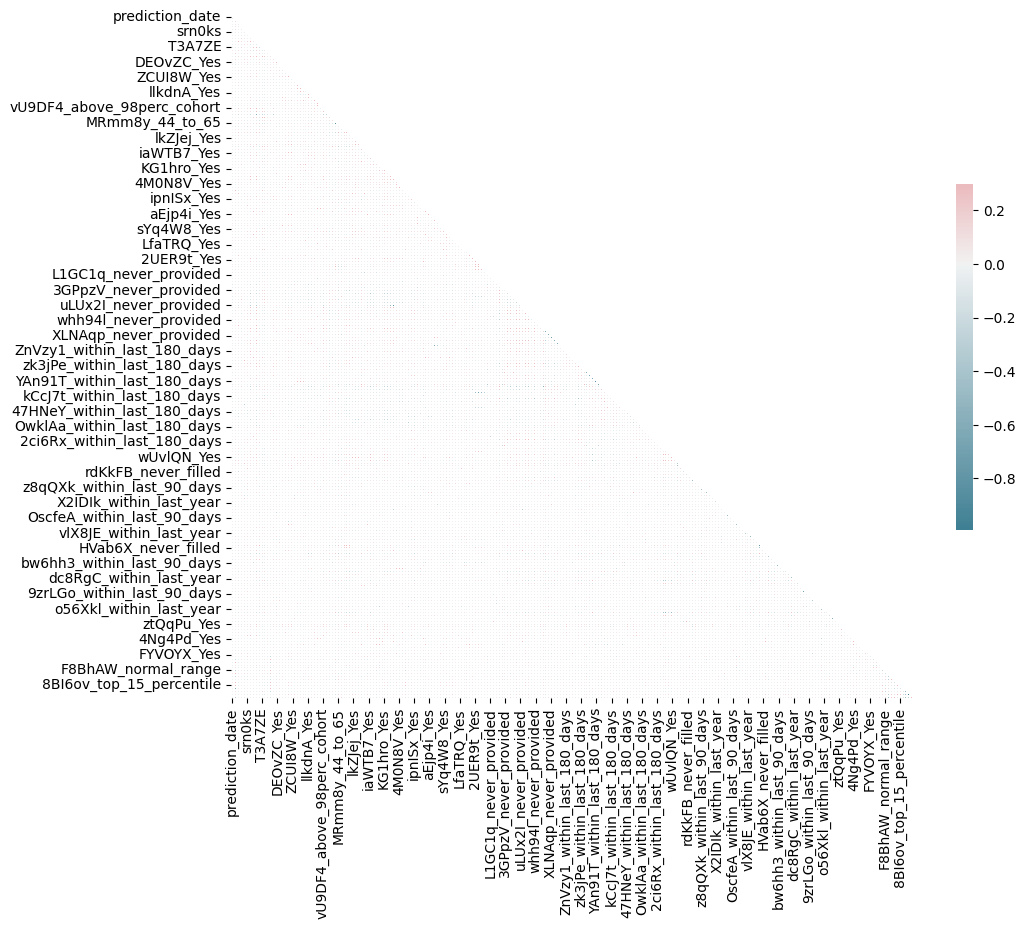

In [41]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Create Models

In [8]:
# drop prediction_date
df.drop(['prediction_date'], axis=1, inplace=True)

### Classification Model

In [9]:
# create xgboost model


X = df.drop(["total_cost_future", "treatment__mental_health"], axis=1)
y = df["treatment__mental_health"]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1000, seed=123)
model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_val, y_val)], verbose=True)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')


[0]	validation_0-logloss:0.55926


/Users/jason/Library/Caches/pypoetry/virtualenvs/health-model-d7ryl5UQ-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-logloss:0.48329
[2]	validation_0-logloss:0.43462
[3]	validation_0-logloss:0.40790
[4]	validation_0-logloss:0.38866
[5]	validation_0-logloss:0.37012
[6]	validation_0-logloss:0.36150
[7]	validation_0-logloss:0.35031
[8]	validation_0-logloss:0.34271
[9]	validation_0-logloss:0.33581
[10]	validation_0-logloss:0.33266
[11]	validation_0-logloss:0.32853
[12]	validation_0-logloss:0.32513
[13]	validation_0-logloss:0.32209
[14]	validation_0-logloss:0.32030
[15]	validation_0-logloss:0.31839
[16]	validation_0-logloss:0.31561
[17]	validation_0-logloss:0.31292
[18]	validation_0-logloss:0.31009
[19]	validation_0-logloss:0.30902
[20]	validation_0-logloss:0.30828
[21]	validation_0-logloss:0.30462
[22]	validation_0-logloss:0.30351
[23]	validation_0-logloss:0.30255
[24]	validation_0-logloss:0.30317
[25]	validation_0-logloss:0.30267
[26]	validation_0-logloss:0.30229
[27]	validation_0-logloss:0.30309
[28]	validation_0-logloss:0.30026
[29]	validation_0-logloss:0.29925
[30]	validation_0-loglo

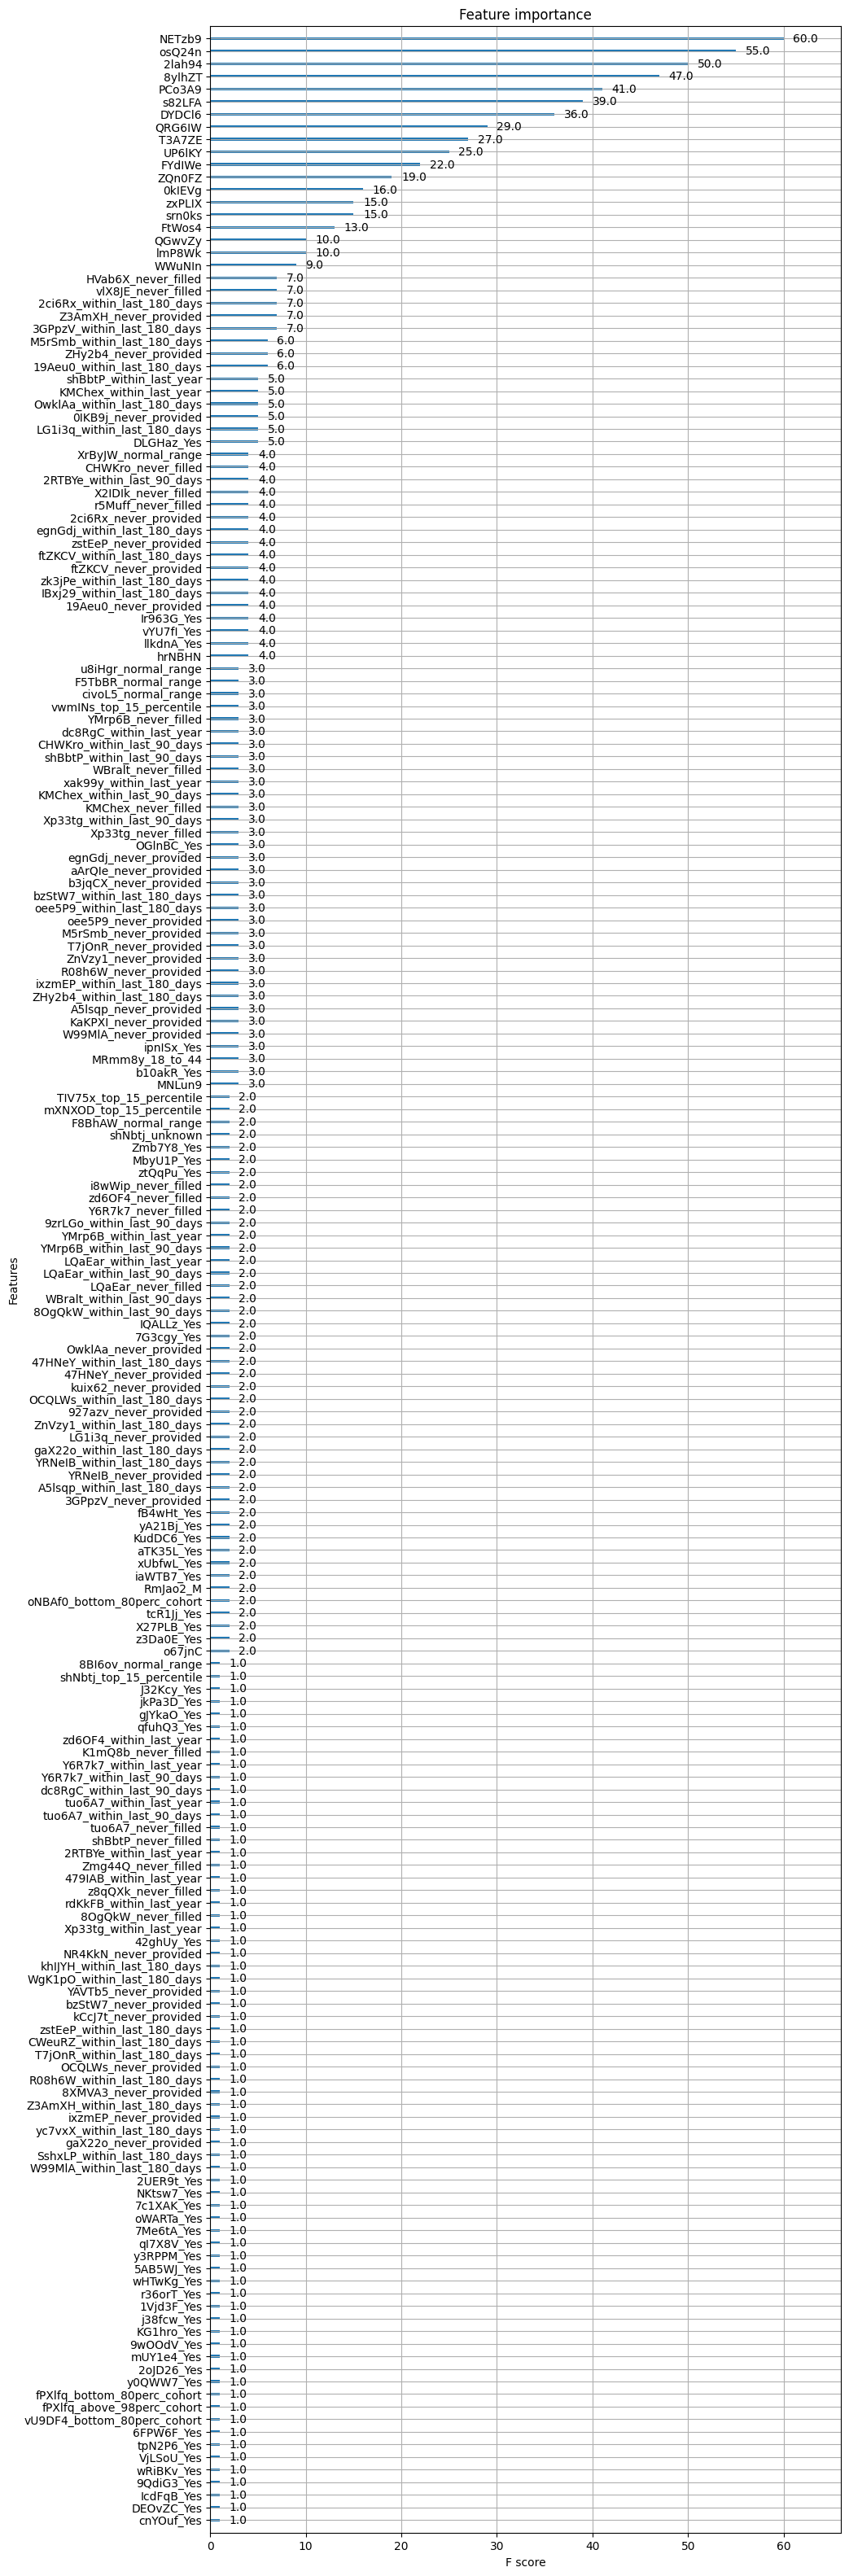

In [14]:
fig, ax = plt.subplots(figsize=(10, 40))
xgb.plot_importance(model, ax=ax)
plt.show()

### Regression Model

In [16]:
# create xgboost model
from sklearn.metrics import mean_squared_error


X = df.drop(["total_cost_future", "treatment__mental_health"], axis=1)
y = df["total_cost_future"]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


cost_model = xgb.XGBRegressor(n_estimators=1000, seed=123)
cost_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_val, y_val)], verbose=True)

y_pred = cost_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')


[0]	validation_0-rmse:3601.24469
[1]	validation_0-rmse:3039.24774
[2]	validation_0-rmse:2675.24988
[3]	validation_0-rmse:2448.34115
[4]	validation_0-rmse:2308.51094
[5]	validation_0-rmse:2223.83047
[6]	validation_0-rmse:2156.22858
[7]	validation_0-rmse:2091.78588
[8]	validation_0-rmse:2012.89910
[9]	validation_0-rmse:1971.92218
[10]	validation_0-rmse:1930.44103
[11]	validation_0-rmse:1899.62900
[12]	validation_0-rmse:1891.76356
[13]	validation_0-rmse:1867.77538
[14]	validation_0-rmse:1831.88553
[15]	validation_0-rmse:1788.98604
[16]	validation_0-rmse:1776.42722
[17]	validation_0-rmse:1759.97784
[18]	validation_0-rmse:1753.32178
[19]	validation_0-rmse:1749.80560
[20]	validation_0-rmse:1746.14479
[21]	validation_0-rmse:1733.92726


/Users/jason/Library/Caches/pypoetry/virtualenvs/health-model-d7ryl5UQ-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:1732.25524
[23]	validation_0-rmse:1723.60229
[24]	validation_0-rmse:1718.10172
[25]	validation_0-rmse:1713.38278
[26]	validation_0-rmse:1704.32837
[27]	validation_0-rmse:1695.67093
[28]	validation_0-rmse:1688.07239
[29]	validation_0-rmse:1687.03046
[30]	validation_0-rmse:1682.07399
[31]	validation_0-rmse:1675.41138
[32]	validation_0-rmse:1671.14459
[33]	validation_0-rmse:1670.40879
[34]	validation_0-rmse:1667.02233
[35]	validation_0-rmse:1664.41493
[36]	validation_0-rmse:1658.94208
[37]	validation_0-rmse:1652.63100
[38]	validation_0-rmse:1648.07757
[39]	validation_0-rmse:1644.20012
[40]	validation_0-rmse:1633.75450
[41]	validation_0-rmse:1632.64607
[42]	validation_0-rmse:1631.90780
[43]	validation_0-rmse:1632.01112
[44]	validation_0-rmse:1628.37768
[45]	validation_0-rmse:1619.68649
[46]	validation_0-rmse:1618.81009
[47]	validation_0-rmse:1615.52550
[48]	validation_0-rmse:1613.34318
[49]	validation_0-rmse:1608.73895
[50]	validation_0-rmse:1607.22687
[51]	validatio

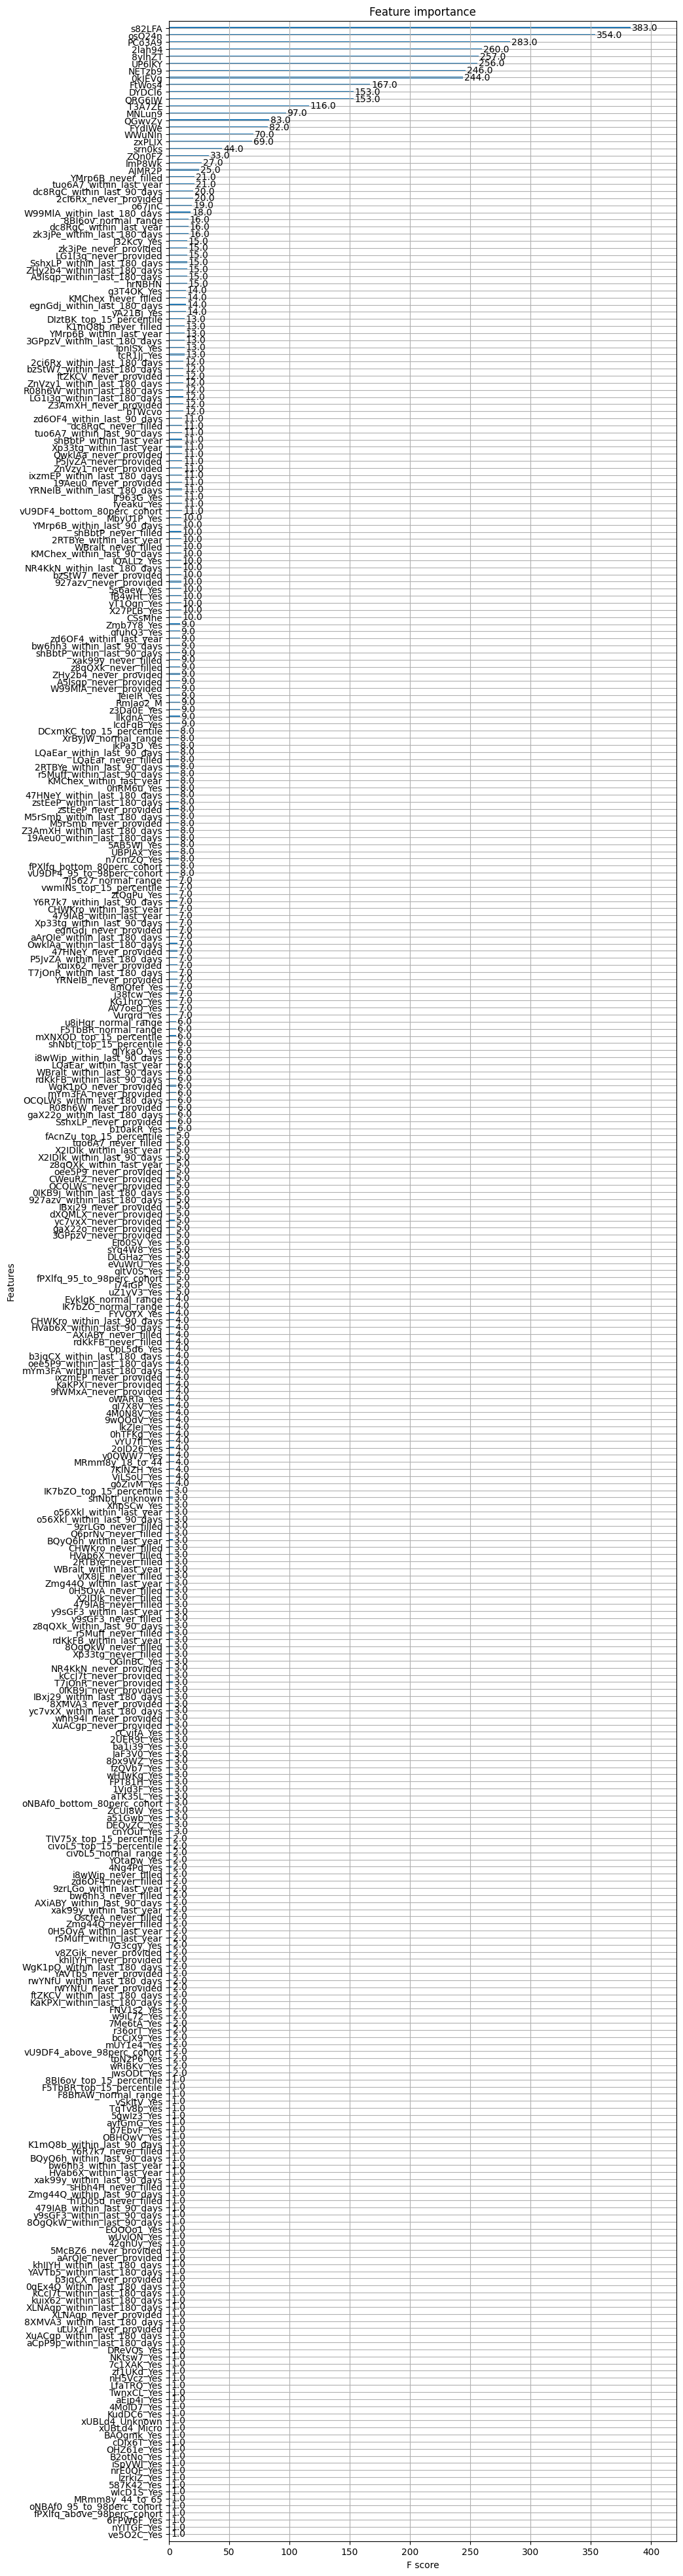

In [18]:
fig, ax = plt.subplots(figsize=(10, 50))
xgb.plot_importance(cost_model, ax=ax)
plt.show()